In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tslearn.metrics import ctw_path, dtw
from tslearn.utils import to_time_series_dataset
from tslearn.barycenters import dtw_barycenter_averaging

In [7]:
current_dir = os.getcwd()
data_dir = 'ClassificationClusteringDatasets'

resource_dir = os.path.join(current_dir, data_dir)
files = os.listdir(resource_dir)
files = np.array([f for f in files if os.path.isfile(resource_dir+'/'+f)])
print(files, len(files))

['50words_TEST' '50words_TRAIN' 'Adiac_TEST' 'Adiac_TRAIN' 'Beef_TEST'
 'Beef_TRAIN' 'CBF_TEST' 'CBF_TRAIN' 'Coffee_TEST' 'Coffee_TRAIN'
 'ECG200_TEST' 'ECG200_TRAIN' 'FaceAll_TEST' 'FaceAll_TRAIN'
 'FaceFour_TEST' 'FaceFour_TRAIN' 'FISH_TEST' 'FISH_TRAIN'
 'Gun_Point_TEST' 'Gun_Point_TRAIN' 'Lightning2_TEST' 'Lightning2_TRAIN'
 'Lightning7_TEST' 'Lightning7_TRAIN' 'OliveOil_TEST' 'OliveOil_TRAIN'
 'OSULeaf_TEST' 'OSULeaf_TRAIN' 'SwedishLeaf_TEST' 'SwedishLeaf_TRAIN'
 'synthetic_control_TEST' 'synthetic_control_TRAIN' 'Trace_TEST'
 'Trace_TRAIN' 'Two_Patterns_TEST' 'Two_Patterns_TRAIN' 'wafer_TEST'
 'wafer_TRAIN' 'yoga_TEST' 'yoga_TRAIN'] 40


In [8]:
dataset = dict()
total_data_count = 0

for i in range(len(files)):
    dataset_name = '_'.join(name for name in files[i].split('_')[0:-1])
    if dataset_name not in dataset:
        dataset[dataset_name] = dict()

    file_path = os.path.join(resource_dir, files[i])
    file = open(file_path, "r")
    data = file.readlines()
    file.close()
    data = [[float(d) for d in time_series.strip().split(' ') if d != ""] for time_series in data]

    for time_series in data:
        total_data_count += 1
        label, series = time_series[0], time_series[1:]
        if label not in dataset[dataset_name]:
            dataset[dataset_name].update({label: [series]})
        else:
            dataset[dataset_name][label].append(series)
total_data_count

23999

In [9]:
read_data_count = 0
for set_name in dataset.keys():
    for l in dataset[set_name]:
        read_data_count += len(dataset[set_name][l])
print("Does the program read data successfully?", read_data_count==total_data_count)

Does the program read data successfully? True


In [10]:
# Define a modified dtw barycenter averaging
def ctw_barycenter_averaging(X, max_iter=100, tol=1e-5):
    X_ = to_time_series_dataset(X)
    sz, d = X_.shape[1:]
      
    # Initial average sequence
    C = np.mean(X_, axis=0)
    # Initial cost
    cost_prev = np.inf

    for it in range(max_iter):
        S = [[] for _ in range(sz)]
        for i, ts in enumerate(X_):
            optimal_path, _, D = ctw_path(C, ts)
            for path in optimal_path:
                i, j = path
                S[i].append(ts[j])
        C = np.zeros((sz, d))
        for i, s in enumerate(S):
            if len(s) > 0:
                C[i] = np.mean(s, axis=0)
            else:
                C[i] = C[i - 1]
        if np.abs(cost_prev - D) < tol:
            print(f"BREAK!! at iteration {it}")
            break
        cost_prev = D
    return C

def intraclass_inertia(centroid, time_series):
    # Compute DTW distances between cluster data and centroid
    distances = [dtw(x, centroid) for x in time_series]
    # Sum the distances to get the within-cluster sum of squares
    return sum(distances)

In [11]:
def shape_averaging(time_series, mode):
    # Compute the DTW barycenter averaging
    averaging = dict()
    for cluster in time_series.keys():
        if mode == 'dtw':
            averaging[cluster] = dtw_barycenter_averaging(time_series[cluster])
        elif mode == 'ctw':
            averaging[cluster] = ctw_barycenter_averaging(time_series[cluster])
        else:
            assert Exception('Invalid averaging method')    

    # Computer the intraclass inertia
    intraclass = dict()
    for cluster in time_series.keys():
        intraclass[cluster] = intraclass_inertia(centroid=averaging[cluster], time_series=time_series[cluster])

    return averaging, intraclass

def visualization(time_series, averaging, intraclass):
    # Visualize the first 3 clusters
    for cluster in list(time_series.keys())[:3]:
        for s in time_series[cluster]:
            plt.plot(s, alpha=.2)
        plt.plot(averaging[cluster])
        plt.suptitle(f"{set_name}: {cluster}")
        plt.title(f"intraclass inertia: {round(intraclass[cluster], 3)}", fontsize=10)
        plt.show()

## 50words Dataset

In [12]:
set_name = "50words"
fiftyWord = dataset[set_name]
fiftyWord.keys()

dict_keys([4.0, 12.0, 13.0, 23.0, 27.0, 1.0, 22.0, 7.0, 9.0, 43.0, 8.0, 3.0, 2.0, 6.0, 24.0, 15.0, 11.0, 16.0, 10.0, 5.0, 33.0, 42.0, 30.0, 14.0, 29.0, 48.0, 40.0, 41.0, 45.0, 34.0, 26.0, 31.0, 28.0, 17.0, 19.0, 25.0, 39.0, 18.0, 21.0, 49.0, 37.0, 35.0, 46.0, 38.0, 20.0, 50.0, 32.0, 47.0, 36.0, 44.0])

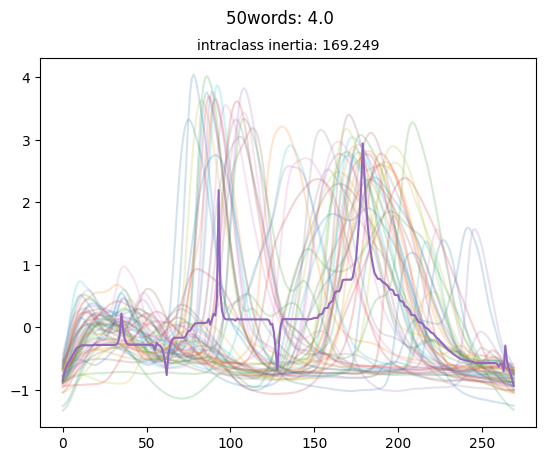

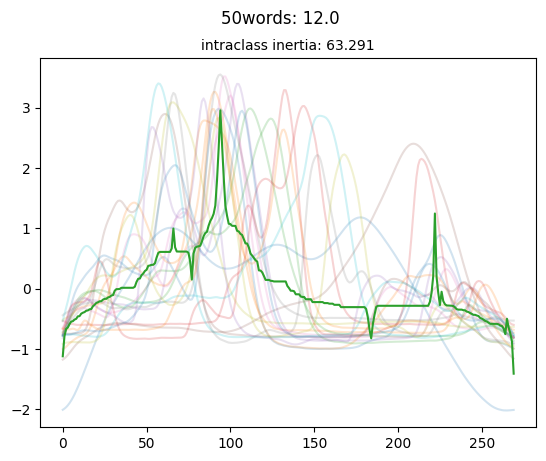

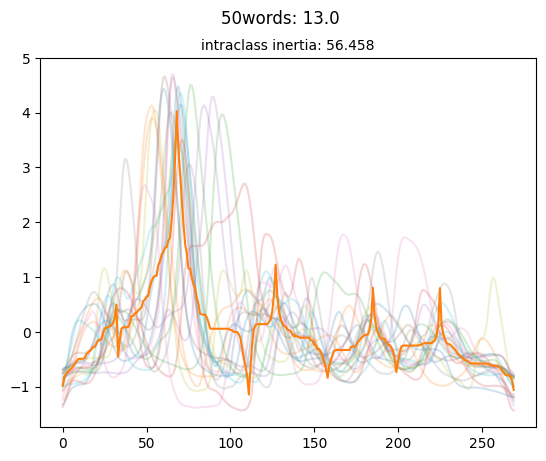

In [13]:
# Compute the DTW barycenter averaging for 50words dataset
dtw_averaging, dtw_intraclass = shape_averaging(time_series=fiftyWord, mode='dtw')
visualization(time_series=fiftyWord, averaging=dtw_averaging, intraclass=dtw_intraclass)

BREAK!! at iteration 26
BREAK!! at iteration 15
BREAK!! at iteration 28
BREAK!! at iteration 22
BREAK!! at iteration 20
BREAK!! at iteration 32
BREAK!! at iteration 24
BREAK!! at iteration 55
BREAK!! at iteration 52
BREAK!! at iteration 70
BREAK!! at iteration 79
BREAK!! at iteration 31
BREAK!! at iteration 20
BREAK!! at iteration 24
BREAK!! at iteration 30
BREAK!! at iteration 17
BREAK!! at iteration 55
BREAK!! at iteration 28
BREAK!! at iteration 47
BREAK!! at iteration 29
BREAK!! at iteration 36
BREAK!! at iteration 30
BREAK!! at iteration 39
BREAK!! at iteration 21
BREAK!! at iteration 13
BREAK!! at iteration 15
BREAK!! at iteration 14
BREAK!! at iteration 81
BREAK!! at iteration 33
BREAK!! at iteration 21
BREAK!! at iteration 34
BREAK!! at iteration 47
BREAK!! at iteration 21
BREAK!! at iteration 18
BREAK!! at iteration 33
BREAK!! at iteration 18
BREAK!! at iteration 32
BREAK!! at iteration 79
BREAK!! at iteration 21
BREAK!! at iteration 15
BREAK!! at iteration 14
BREAK!! at itera

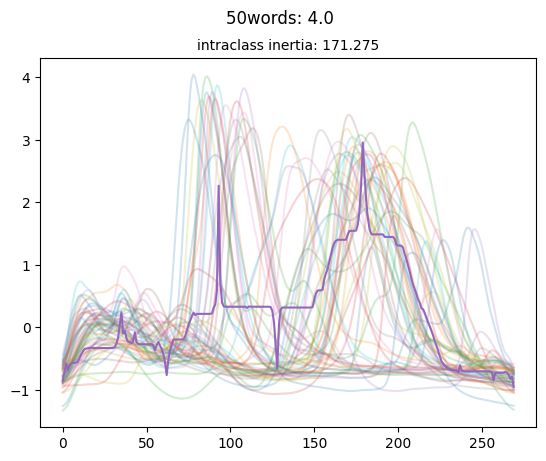

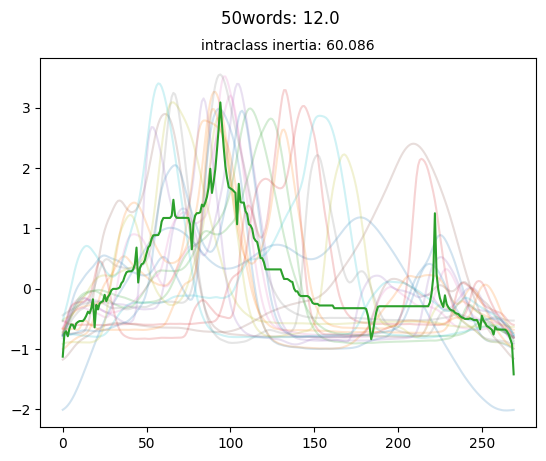

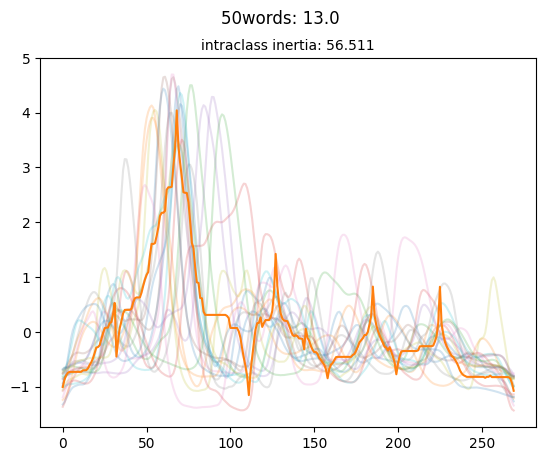

In [18]:
# Compute the CTW barycenter averaging for 50words dataset
ctw_averaging, ctw_intraclass = shape_averaging(time_series=fiftyWord, mode='ctw')
visualization(time_series=fiftyWord, averaging=ctw_averaging, intraclass=ctw_intraclass)

In [19]:
print(f"Total intraclass inertia from DTW Barycenter Averaging: {round(sum(dtw_intraclass.values()), 3)}")
print(f"Total intraclass inertia from CTW Barycenter Averaging: {round(sum(ctw_intraclass.values()), 3)}")

Total intraclass inertia from DTW Barycenter Averaging: 1956.322
Total intraclass inertia from CTW Barycenter Averaging: 1943.378


## ECG200 Dataset

In [20]:
set_name = "ECG200"
ECG200 = dataset[set_name]
ECG200.keys()

dict_keys([1.0, -1.0])

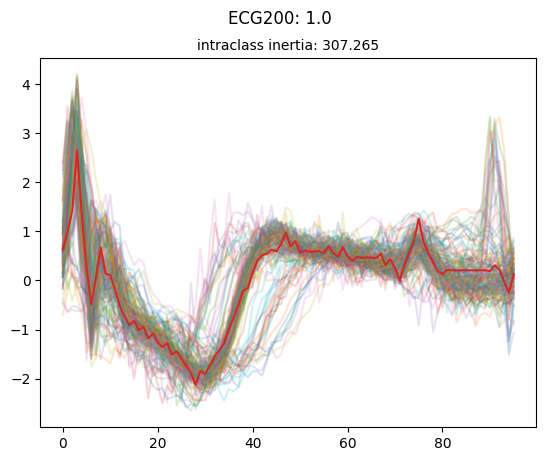

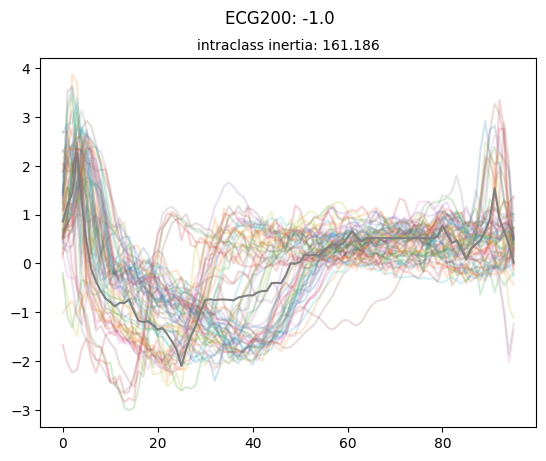

In [22]:
# Compute the DTW barycenter averaging for ECG200 dataset
dtw_averaging, dtw_intraclass = shape_averaging(time_series=ECG200, mode='dtw')
visualization(time_series=ECG200, averaging=dtw_averaging, intraclass=dtw_intraclass)

BREAK!! at iteration 82
BREAK!! at iteration 40


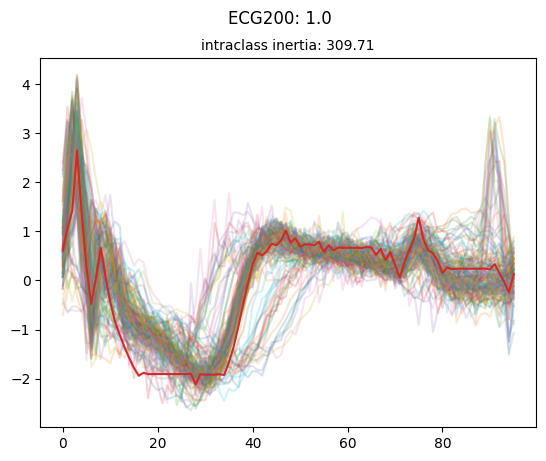

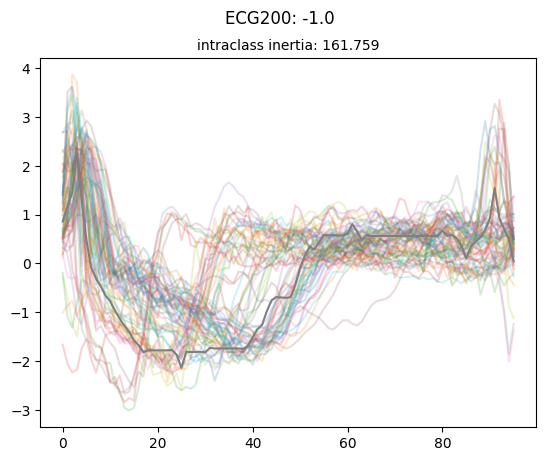

In [23]:
# Compute the CTW barycenter averaging for ECG200 dataset
ctw_averaging, ctw_intraclass = shape_averaging(time_series=ECG200, mode='ctw')
visualization(time_series=ECG200, averaging=ctw_averaging, intraclass=ctw_intraclass)

In [24]:
print(f"Total intraclass inertia from DTW Barycenter Averaging: {round(sum(dtw_intraclass.values()), 3)}")
print(f"Total intraclass inertia from CTW Barycenter Averaging: {round(sum(ctw_intraclass.values()), 3)}")

Total intraclass inertia from DTW Barycenter Averaging: 468.451
Total intraclass inertia from CTW Barycenter Averaging: 471.469


## Gun_Point Dataset

In [ ]:
set_name = "Gun_Point"
Gunpoint = dataset[set_name]
Gunpoint.keys()

dict_keys([1.0, 2.0])

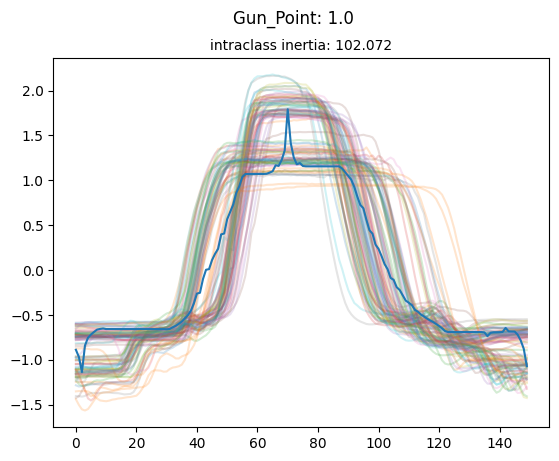

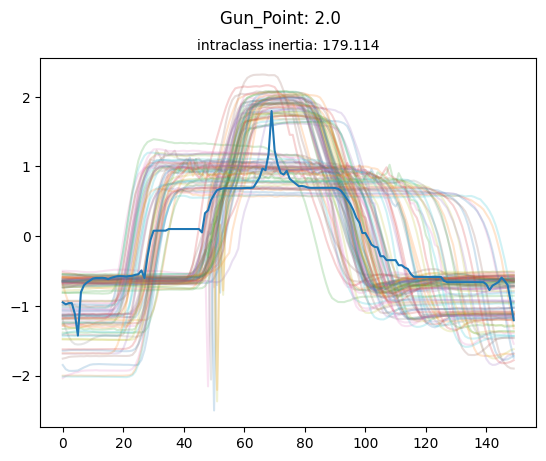

In [ ]:
# Compute the DTW barycenter averaging for Gun_Point dataset
dtw_averaging, dtw_intraclass = shape_averaging(time_series=Gunpoint, mode='dtw')
visualization(time_series=Gunpoint, averaging=dtw_averaging, intraclass=dtw_intraclass)

BREAK!! at iteration 78
BREAK!! at iteration 48


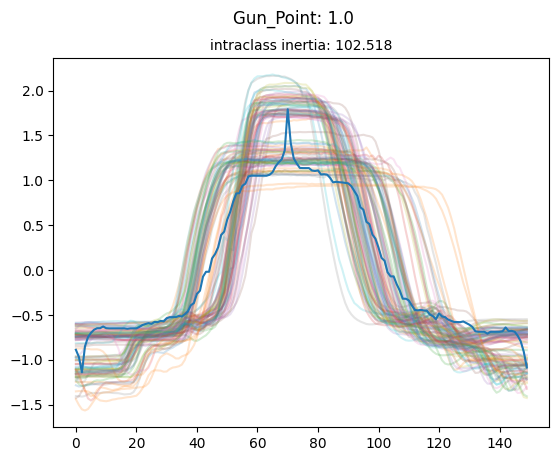

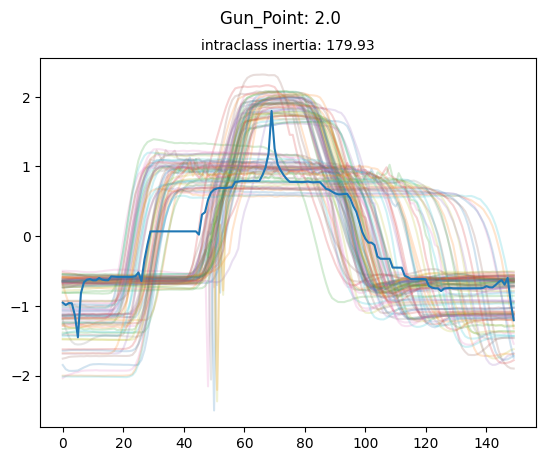

In [ ]:
# Compute the CTW barycenter averaging for Gun_Point dataset
ctw_averaging, ctw_intraclass = shape_averaging(time_series=Gunpoint, mode='ctw')
visualization(time_series=Gunpoint, averaging=ctw_averaging, intraclass=ctw_intraclass)

In [ ]:
print(f"Total intraclass inertia from DTW Barycenter Averaging: {round(sum(dtw_intraclass.values()), 3)}")
print(f"Total intraclass inertia from CTW Barycenter Averaging: {round(sum(ctw_intraclass.values()), 3)}")

Total intraclass inertia from DTW Barycenter Averaging: 281.186
Total intraclass inertia from CTW Barycenter Averaging: 282.448


## FaceALL Dataset

In [29]:
set_name = "FaceAll"
Faceall = dataset[set_name]
Faceall.keys()

dict_keys([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0])

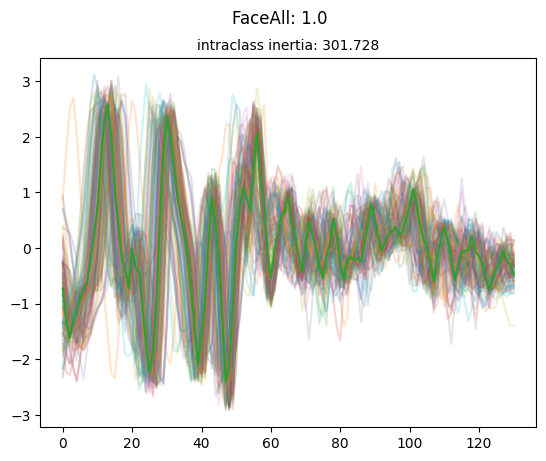

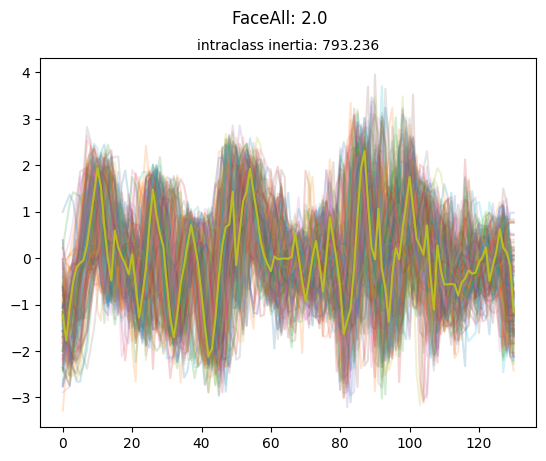

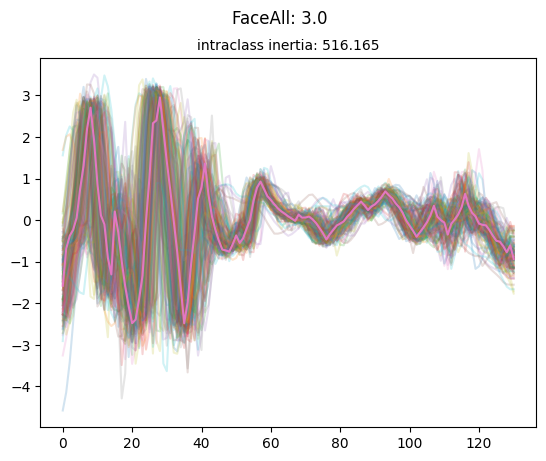

In [30]:
# Compute the DTW barycenter averaging for Gun_Point dataset
dtw_averaging, dtw_intraclass = shape_averaging(time_series=Faceall, mode='dtw')
visualization(time_series=Faceall, averaging=dtw_averaging, intraclass=dtw_intraclass)

BREAK!! at iteration 34
BREAK!! at iteration 82
BREAK!! at iteration 75
BREAK!! at iteration 63
BREAK!! at iteration 53
BREAK!! at iteration 39
BREAK!! at iteration 97
BREAK!! at iteration 34
BREAK!! at iteration 37
BREAK!! at iteration 32
BREAK!! at iteration 58
BREAK!! at iteration 41


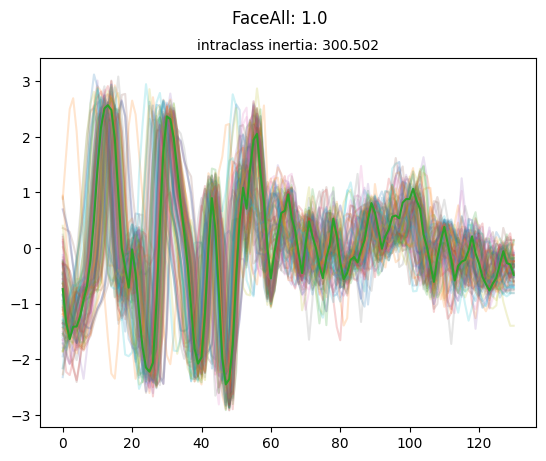

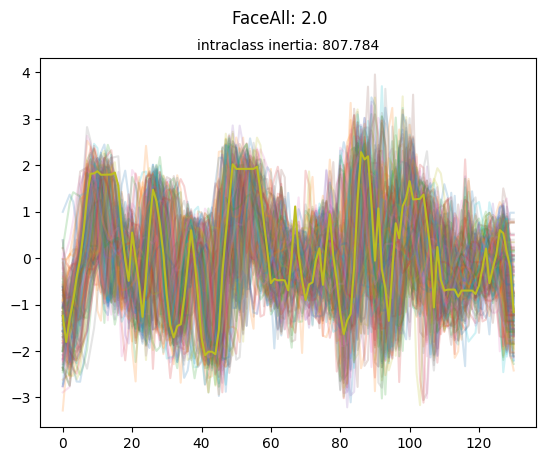

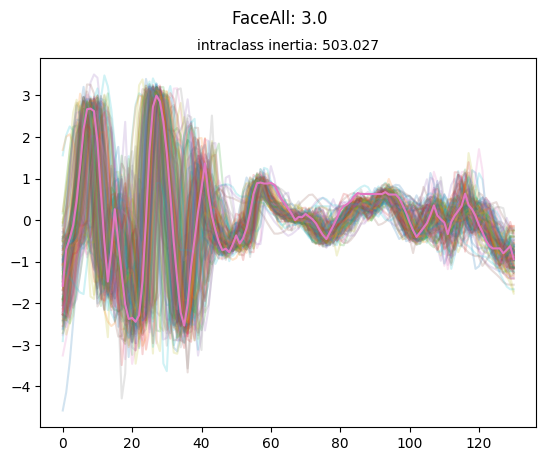

In [31]:
# Compute the CTW barycenter averaging for Gun_Point dataset
ctw_averaging, ctw_intraclass = shape_averaging(time_series=Faceall, mode='ctw')
visualization(time_series=Faceall, averaging=ctw_averaging, intraclass=ctw_intraclass)

In [32]:
print(f"Total intraclass inertia from DTW Barycenter Averaging: {round(sum(dtw_intraclass.values()), 3)}")
print(f"Total intraclass inertia from CTW Barycenter Averaging: {round(sum(ctw_intraclass.values()), 3)}")

Total intraclass inertia from DTW Barycenter Averaging: 8260.359
Total intraclass inertia from CTW Barycenter Averaging: 8407.453


## FaceFour Dataset

In [33]:
set_name = "FaceFour"
Facefour = dataset[set_name]
Facefour.keys()

dict_keys([3.0, 1.0, 2.0, 4.0])

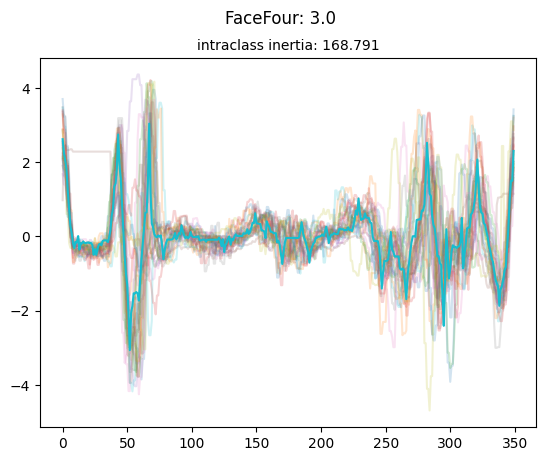

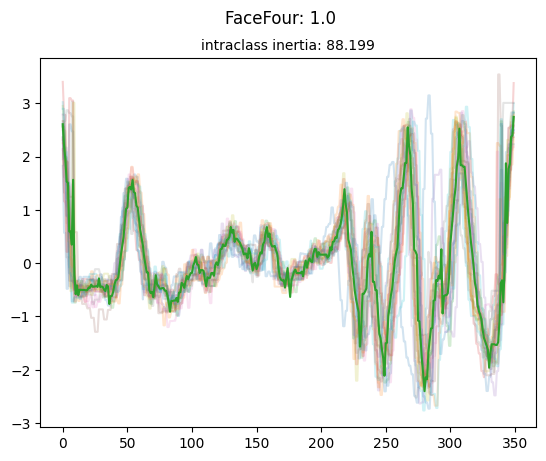

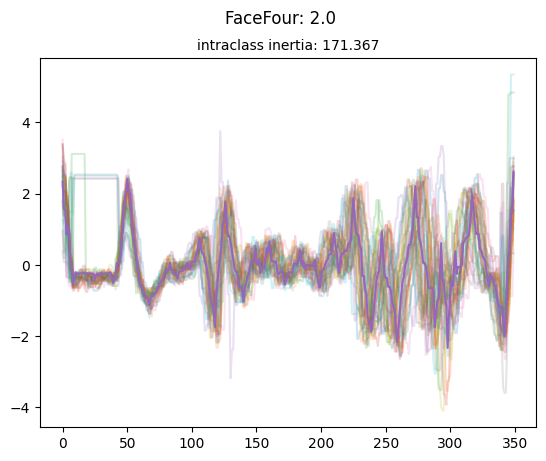

In [34]:
# Compute the DTW barycenter averaging for Gun_Point dataset
dtw_averaging, dtw_intraclass = shape_averaging(time_series=Facefour, mode='dtw')
visualization(time_series=Facefour, averaging=dtw_averaging, intraclass=dtw_intraclass)

BREAK!! at iteration 33
BREAK!! at iteration 17
BREAK!! at iteration 35
BREAK!! at iteration 40


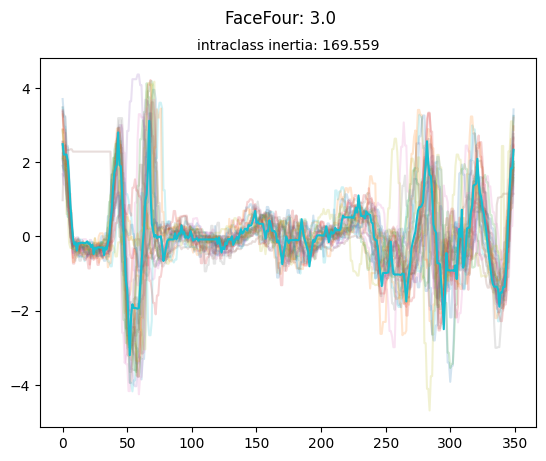

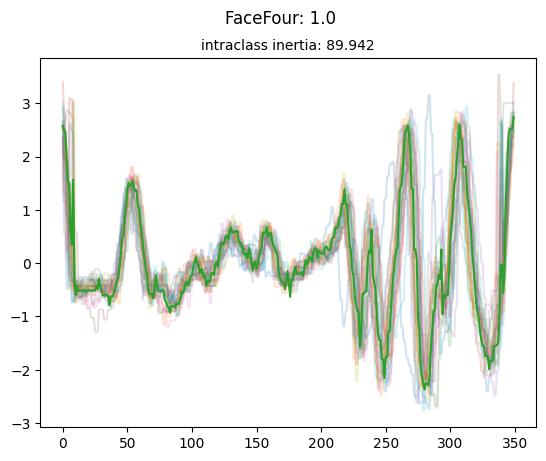

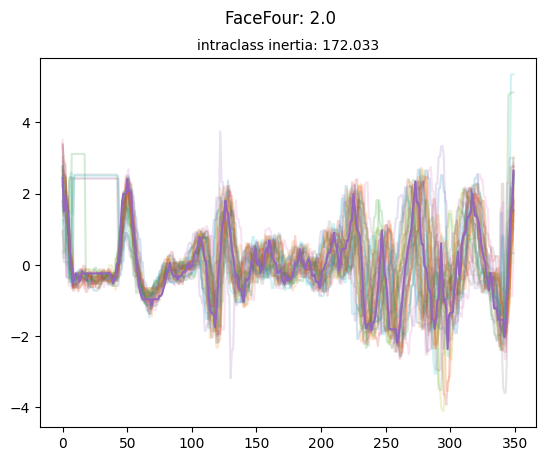

In [35]:
# Compute the CTW barycenter averaging for Gun_Point dataset
ctw_averaging, ctw_intraclass = shape_averaging(time_series=Facefour, mode='ctw')
visualization(time_series=Facefour, averaging=ctw_averaging, intraclass=ctw_intraclass)

In [36]:
print(f"Total intraclass inertia from DTW Barycenter Averaging: {round(sum(dtw_intraclass.values()), 3)}")
print(f"Total intraclass inertia from CTW Barycenter Averaging: {round(sum(ctw_intraclass.values()), 3)}")

Total intraclass inertia from DTW Barycenter Averaging: 549.515
Total intraclass inertia from CTW Barycenter Averaging: 557.516


# test

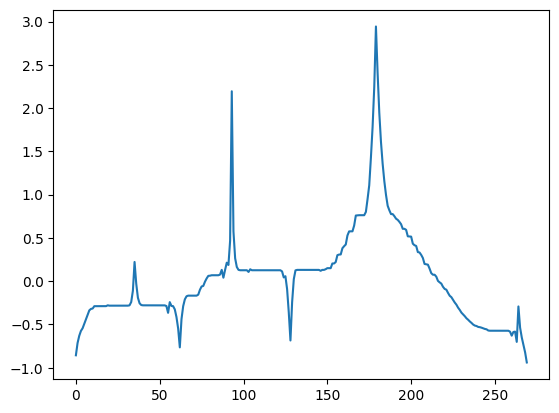

In [27]:
plt.plot(dtw_barycenter_averaging(fiftyWord_4))
plt.show()

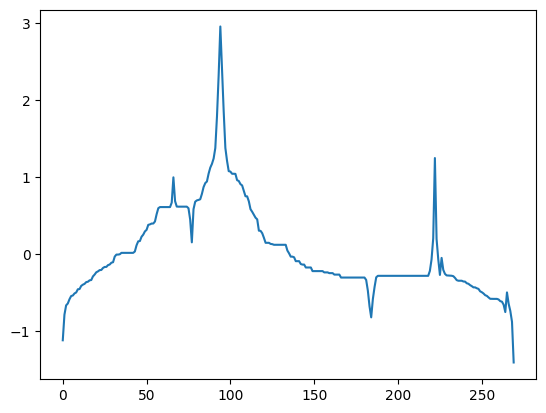

In [28]:
plt.plot(dtw_barycenter_averaging(fiftyWord_12))
plt.show()

In [32]:
trace = dataset['Trace']
print(fiftyWord.keys(), len(fiftyWord.keys()))

dict_keys([3.0, 1.0, 2.0, 4.0]) 4


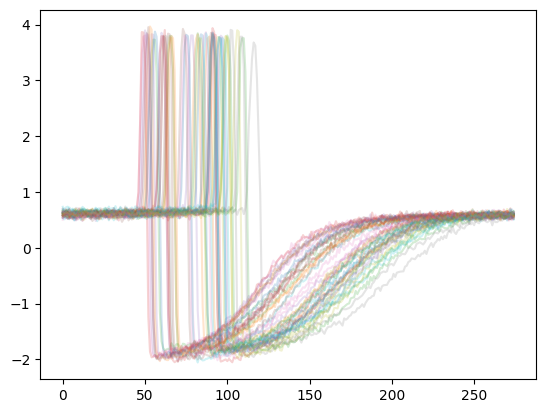

In [40]:
trace_2 = trace[1.0]
for s in trace_2:
    plt.plot(s, alpha=.2)
plt.show()

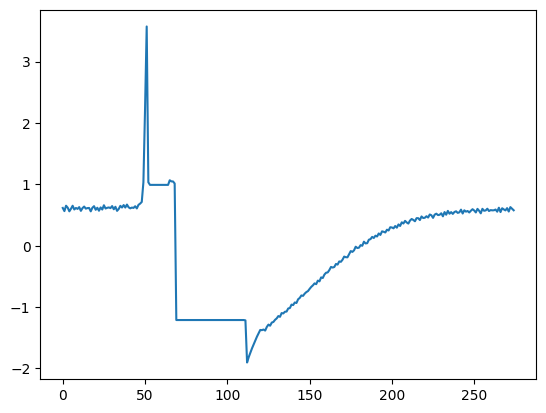

In [54]:
plt.plot(dtw_barycenter_averaging(trace_2, max_iter=100))
plt.show()

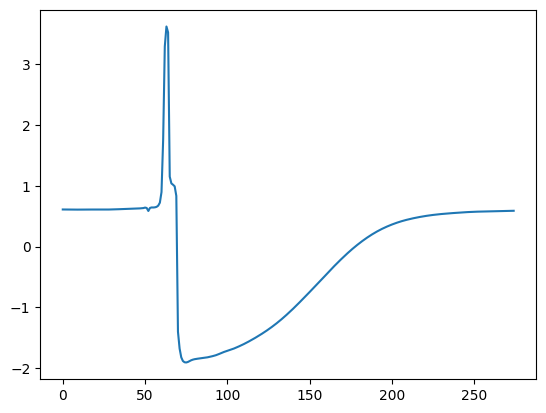

In [43]:
plt.plot(softdtw_barycenter(trace_2))
plt.show()

In [39]:
file_path = os.path.join(resource_dir, files[0])
file = open(file_path, "r")
data = file.readlines()
file.close()
# data = [d.strip() for d in data]
data = np.array([[float(d) for d in time_series.strip().split(' ') if d != ""] for time_series in data])
data

array([[ 4.        , -0.8909419 , -0.86099477, ..., -0.9194184 ,
        -0.93017828, -0.93938957],
       [12.        , -0.78346205, -0.68561749, ..., -0.96623282,
        -0.98049795, -0.99177639],
       [13.        , -1.3255684 , -1.284301  , ..., -1.1368405 ,
        -1.1979657 , -1.2699682 ],
       ...,
       [25.        , -1.1053955 , -1.0897564 , ..., -0.99401827,
        -1.0461744 , -1.0878249 ],
       [15.        , -1.5496778 , -1.4996599 , ..., -1.5721602 ,
        -1.5654099 , -1.55735   ],
       [16.        , -1.1383294 , -1.1175451 , ..., -0.99576816,
        -1.050867  , -1.1040808 ]])

In [32]:
dataset = dict()
dataset['test'] = {'1': [[1,2,3,4,5]]}
dataset['test']['1'].append([6,7,8,9,10])
dataset

{'test': {'1': [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]}}